<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/84_C_DOE_DOS_FACTORES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.graphics.factorplots import interaction_plot
#!pip install bioinfokit
#from bioinfokit.analys import stat
#!pip install pingouin
import pingouin as pg

#  **Tema 6: Diseño Factorial -Dos Factores usando Python**

##  **Ejemplo de un Diseño Factorial $4\bigotimes3$**.

### **Consideremos un experimento en el que se quiere estudiar el efecto de los factores velocidad de alimentación y profundidad de corte sobre el acabado de un metal. Aunque los factores son de naturaleza continua, en este proceso sólo se pueden trabajar en 3 y 4 niveles, respectivamente. Por ello, se decide correr un factorial completo $4\bigotimes3$ con tres réplicas, que permitirá obtener toda la información relevante en relación al efecto de estos factores sobre el acabado. Aleatorizando las 36 pruebas se obtienen los datos en la tabla siguiente. El acabado ($Y$) está en unidades de gramos e interesa minimizar su valor.**

|B: Velocidad \ A: Profundidad|	0.15	|0.18	|0.21	|0.24|
|:--:|:--:|:--:|:--:|:--:|
|0.20	|74, 64, 60|	79, 68, 73|	82, 88, 92|	99, 104, 96|
|0.25	|92, 86, 88|	98, 104, 88|	99, 108, 95|	104, 110, 99|
|0.30	|99, 98, 102|	104, 99, 95	|108, 110, 99|	114, 111, 107|



## **6.1 Los Datos del Problema**

In [ ]:
## **4.1 Los Datos del Problema**
Profundidad  =  ([0.15]*3+[0.18]*3+[0.21]*3+[0.24]*3)*3
Velocidad  =  [0.20]*12+[0.25]*12+[0.30]*12

Acabado =[74, 64, 60, 79, 68, 73, 82, 88, 92, 99, 104, 96, 92,
          86, 88,	98, 104, 88,	99, 108, 95,	104, 110, 99, 99,
          98, 102,	104, 99, 95,	108, 110, 99,	114, 111, 107]

## **6.2 Construyamos el dataFrame de los Datos**

In [ ]:
## **6.2 Construyamos el dataFrame de los datos**
D2F = pd.DataFrame({'Velocidad':Velocidad, 'Profundidad':Profundidad, 'Acabado':Acabado})



## **6.3 Veamos el DataFrame**
### **a. DataFrame**

In [ ]:
## **6.3 Veamos el DataFrame**
D2F.head()

,Velocidad,Profundidad,Acabado
0,0.2,0.15,74
1,0.2,0.15,64
2,0.2,0.15,60
3,0.2,0.18,79
4,0.2,0.18,68


### **b. Media y desviación estandard por Factores**

In [ ]:
# **b. Media y desviación estandard**
print('Acabado media y desviación típica por Velocidad')
D2F.groupby('Velocidad')['Acabado'].agg(['mean', 'std'])

Acabado media y desviación típica por Velocidad


,mean,std
Velocidad,,
0.20,81.583333,14.336592
0.25,97.583333,8.005207
0.30,103.833333,6.072791


In [ ]:
# **b. Media y desviación estandard**
print('Acabado media y desviación típica por Profundidad')
D2F.groupby('Profundidad')['Acabado'].agg(['mean', 'std'])

Acabado media y desviación típica por Profundidad


,mean,std
Profundidad,,
0.15,84.777778,15.409232
0.18,89.777778,13.507200
0.21,97.888889,9.662355
0.24,104.888889,6.132790


# **c. Media y desviación estandard por combinación de Factores**

In [ ]:
# **c. Media y desviación estandard por combinación de Factores**
print('Resistencia media y desviación típica por templado y grosor')
D2F.groupby(['Velocidad', 'Profundidad'])['Acabado'].agg(['mean', 'std'])

Resistencia media y desviación típica por templado y grosor


mean       std
Velocidad Profundidad                      
0.20      0.15          66.000000  7.211103
          0.18          73.333333  5.507571
          0.21          87.333333  5.033223
          0.24          99.666667  4.041452
0.25      0.15          88.666667  3.055050
          0.18          96.666667  8.082904
          0.21         100.666667  6.658328
          0.24         104.333333  5.507571
0.30      0.15          99.666667  2.081666
          0.18          99.333333  4.509250
          0.21         105.666667  5.859465
          0.24         110.666667  3.511885

## **6.4. BoxPlot para el Diseño**

<Axes: title={'center': 'Acabado vs Velocidad'}, xlabel='Profundidad', ylabel='Acabado'>

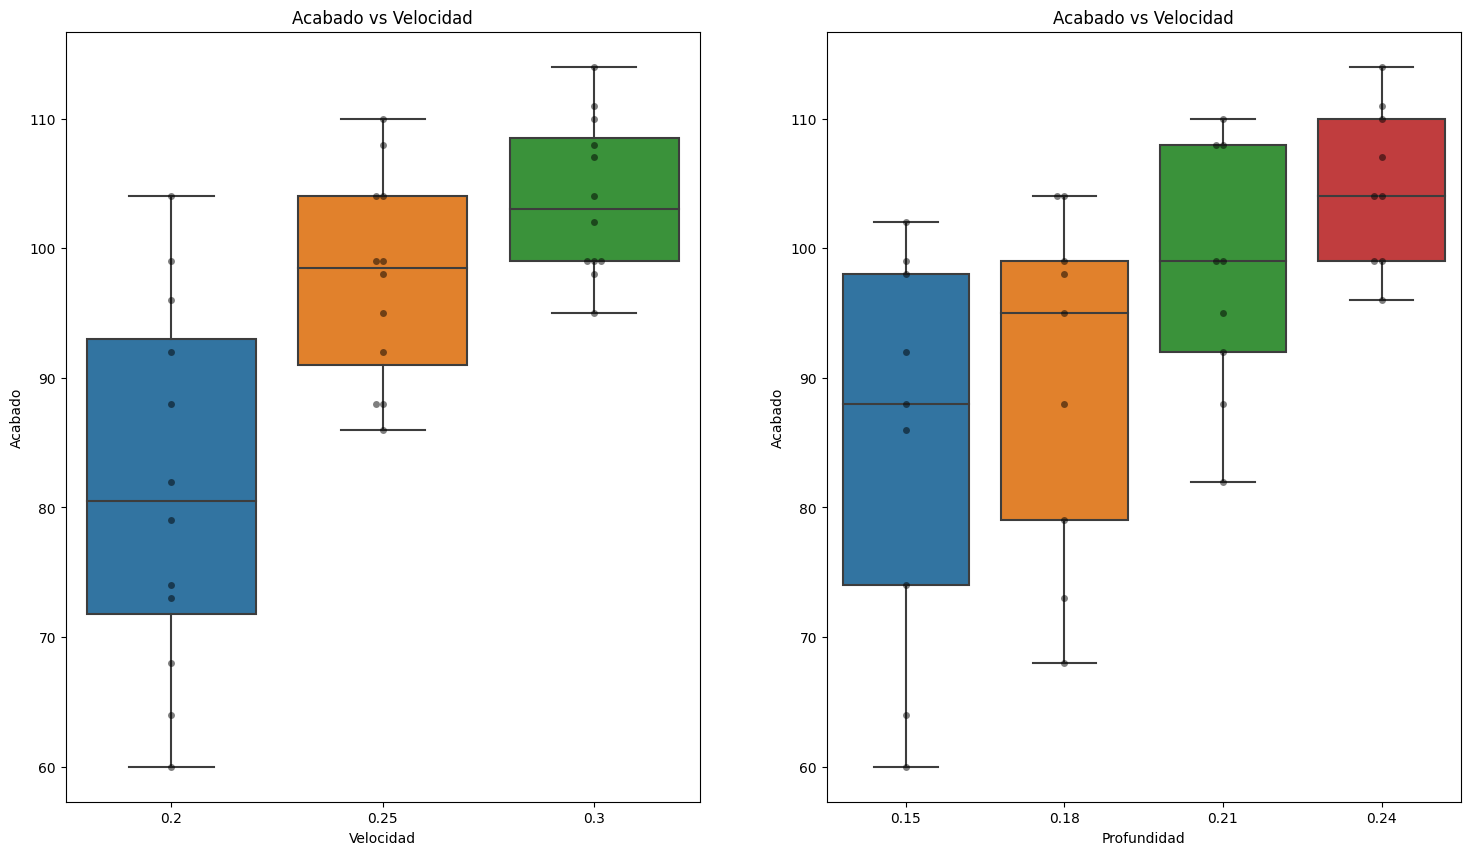

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
axs[0].set_title('Acabado vs Velocidad')
sns.boxplot(x="Velocidad", y="Acabado", data=D2F, ax=axs[0])
sns.swarmplot(x="Velocidad", y="Acabado", data=D2F, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Acabado vs Velocidad')
sns.boxplot(x="Profundidad", y="Acabado", data=D2F, ax=axs[1])
sns.swarmplot(x="Profundidad", y="Acabado", data=D2F, color='black',
              alpha = 0.5, ax=axs[1])



## **6.5 Diagrama Bivariado esposible dado que  hay replicas**

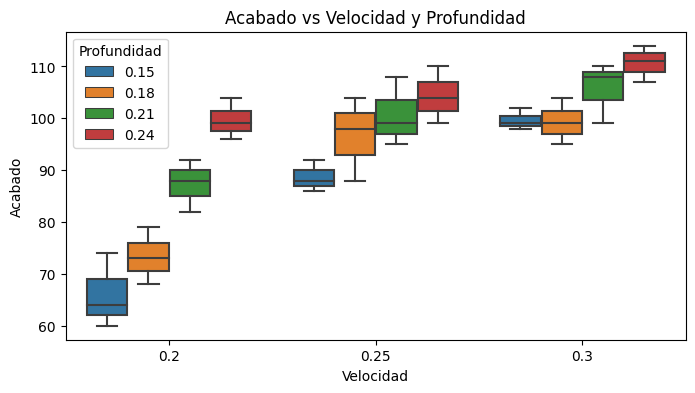

In [ ]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Acabado vs Velocidad y Profundidad')
sns.boxplot(x="Velocidad", y="Acabado", hue='Profundidad', data=D2F, ax=ax);

## **6.6 Análisis de Varianza Tipo II**

In [ ]:
# **a. Análisis de Varianza2**
modeloD2F = smf.ols("Acabado ~ C(Velocidad) + C(Profundidad)+C(Velocidad) * C(Profundidad)", data = D2F).fit()
print(modeloD2F.summary())

                            OLS Regression Results                            
Dep. Variable:                Acabado   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     18.49
Date:                Wed, 10 May 2023   Prob (F-statistic):           4.11e-09
Time:                        12:43:51   Log-Likelihood:                -104.22
No. Observations:                  36   AIC:                             232.4
Df Residuals:                      24   BIC:                             251.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
# **b Análisis de Varianza Tipo II**
modeloD2F = ols("Acabado ~ C(Velocidad) + C(Profundidad)+C(Velocidad) * C(Profundidad)", data = D2F).fit()
anova_result = sm.stats.anova_lm(modeloD2F, typ=2)
print (anova_result)

                                  sum_sq    df          F        PR(>F)
C(Velocidad)                 3160.500000   2.0  55.018375  1.086046e-09
C(Profundidad)               2125.111111   3.0  24.662798  1.652000e-07
C(Velocidad):C(Profundidad)   557.055556   6.0   3.232431  1.797302e-02
Residual                      689.333333  24.0        NaN           NaN


In [ ]:
anova_result.T

,C(Velocidad),C(Profundidad),C(Velocidad):C(Profundidad),Residual
sum_sq,3.160500e+03,2.125111e+03,557.055556,689.333333
df,2.000000e+00,3.000000e+00,6.000000,24.000000
F,5.501838e+01,2.466280e+01,3.232431,NaN
PR(>F),1.086046e-09,1.652000e-07,0.017973,NaN


In [ ]:
print(modeloD2F.summary())

                            OLS Regression Results                            
Dep. Variable:                Acabado   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     18.49
Date:                Wed, 10 May 2023   Prob (F-statistic):           4.11e-09
Time:                        12:43:52   Log-Likelihood:                -104.22
No. Observations:                  36   AIC:                             232.4
Df Residuals:                      24   BIC:                             251.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

# **Anova 2**

In [ ]:
# **Anova 2**
pg.anova(
    data     = D2F,
    dv       = 'Acabado',
    between  = ['Velocidad', 'Profundidad'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,Velocidad,3160.5000,2,1580.2500,55.0184,0.000,0.8209
1,Profundidad,2125.1111,3,708.3704,24.6628,0.000,0.7551
2,Velocidad * Profundidad,557.0556,6,92.8426,3.2324,0.018,0.4469
3,Residual,689.3333,24,28.7222,NaN,NaN,NaN


# **6.7 Gráfico de interacciones**

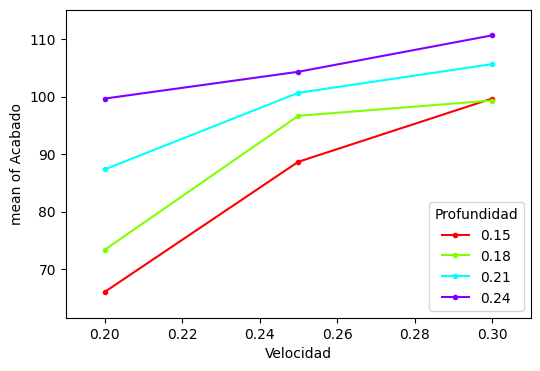

In [ ]:
# **6.7 Gráfico de interacciones**
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = D2F.Velocidad,
    trace    = D2F.Profundidad,
    response = D2F.Acabado,
    ax       = ax,
)

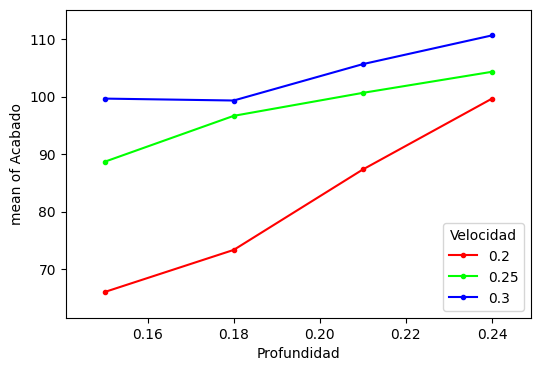

In [ ]:
# **6.7 Gráfico de interacciones**
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = D2F.Profundidad,
    trace    = D2F.Velocidad,
    response = D2F.Acabado,
    ax       = ax,
)

## **6.8 Comparaciones Múltiples - HSD TUKEY**
### **a. Comparaciones Múltiples: Acabado VS Profundidad**

group1,group2,meandiff,p-adj,lower,upper,reject
0.15,0.18,5.0,0.8029,-9.9883,19.9883,False
0.15,0.21,13.1111,0.1036,-1.8772,28.0994,False
0.15,0.24,20.1111,0.0051,5.1228,35.0994,True
0.18,0.21,8.1111,0.469,-6.8772,23.0994,False
0.18,0.24,15.1111,0.0476,0.1228,30.0994,True
0.21,0.24,7.0,0.591,-7.9883,21.9883,False


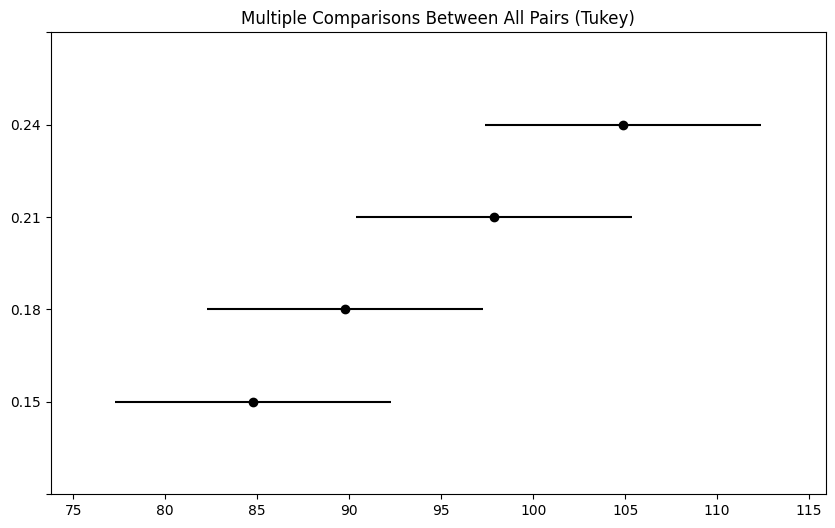

In [ ]:
### **a. Comparaciones Múltiples: Acabado VS Profundidad**
tukey = pairwise_tukeyhsd(endog=D2F["Acabado"],     # Data
                          groups=D2F["Profundidad"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **b. Comparaciones Múltiples: Acabado VS Velocidad**

group1,group2,meandiff,p-adj,lower,upper,reject
0.2,0.25,16.0,0.0013,5.8745,26.1255,True
0.2,0.3,22.25,0.0,12.1245,32.3755,True
0.25,0.3,6.25,0.2972,-3.8755,16.3755,False


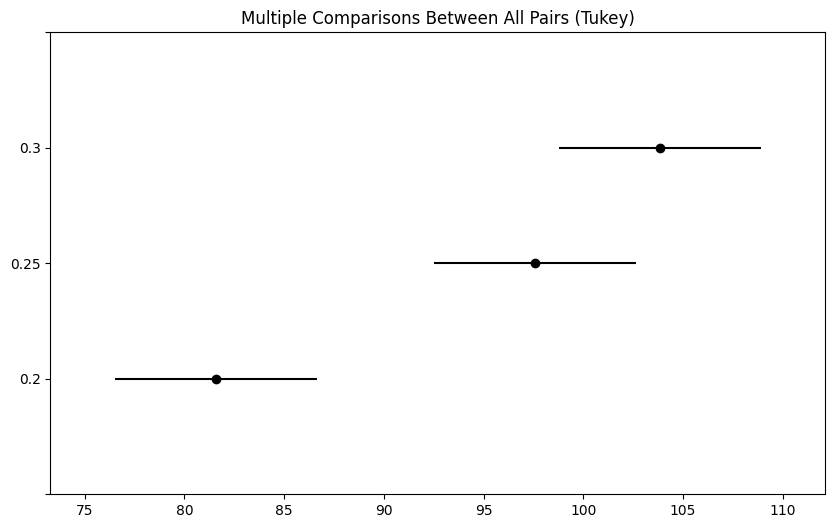

In [ ]:
### **b. Comparaciones Múltiples: Acabado VS Velocidad**
tukey = pairwise_tukeyhsd(endog=D2F["Acabado"],     # Data
                          groups=D2F["Velocidad"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **6.9 Supuestos del Modelo**
## **a. Normalidad con Shapiro Wilks**

In [ ]:
# **a. Forma 1. Shapiro Wilks**
w, pvalue =stats.shapiro(modeloD2F.resid)
print('El estadístico de prueba es w = ',w,'y su valor p =', pvalue, 'mayor que 5%')

El estadístico de prueba es w =  0.9705113768577576 y su valor p = 0.43967142701148987 mayor que 5%


# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

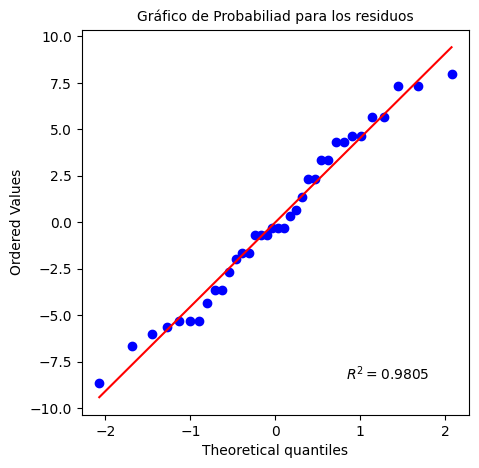

In [ ]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloD2F.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

## **C. Histograma + curva normal teórica**

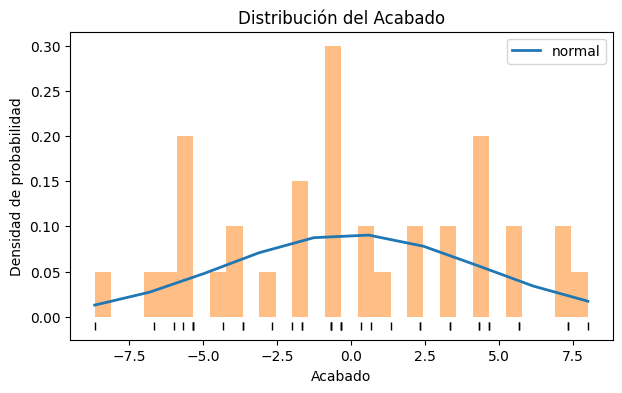

In [ ]:
## **c. Histograma + curva normal teórica**
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
tgp2 = modeloD2F.resid
mu, sigma = stats.norm.fit(tgp2)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(tgp2), max(tgp2), num=10)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=tgp2, density=True, bins=30,  alpha=0.5)
ax.plot(tgp2, np.full_like(tgp2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del Acabado')
ax.set_xlabel('Acabado')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

## **d. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [ ]:
# d. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(D2F['Acabado'][D2F['Profundidad'] == 0.15],
             D2F['Acabado'][D2F['Profundidad'] == 0.18],
             D2F['Acabado'][D2F['Profundidad'] == 0.21],
            D2F['Acabado'][D2F['Profundidad'] == 0.24])

LeveneResult(statistic=1.6933626601112695, pvalue=0.18808805130523845)

In [ ]:
# d. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(D2F['Acabado'][D2F['Velocidad'] == 0.20],
             D2F['Acabado'][D2F['Velocidad'] == 0.25],
             D2F['Acabado'][D2F['Velocidad'] == 0.30])

LeveneResult(statistic=5.767080745341613, pvalue=0.007112804860195111)